In [1]:
# Let's Strat the project
# This is going to be a  clustering Project

In [2]:
# Let's Preprocess the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

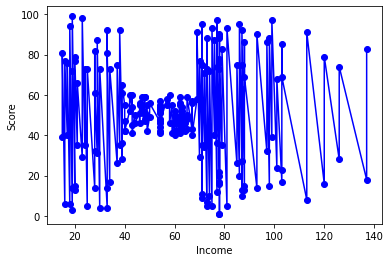

In [5]:
# Let's do some visualization to understand the data better.
# Let's plot the data according to Age and Annual Income:
plt.plot(df['Annual Income (k$)'], df['Spending Score (1-100)'], color = 'blue', marker = 'o')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show

In [6]:
#It seems that there is not a logical correlation between Income and Score
#Let's check the correlation between sex and score
df.groupby(['Gender'])['Gender'].count()

Gender
Female    112
Male       88
Name: Gender, dtype: int64

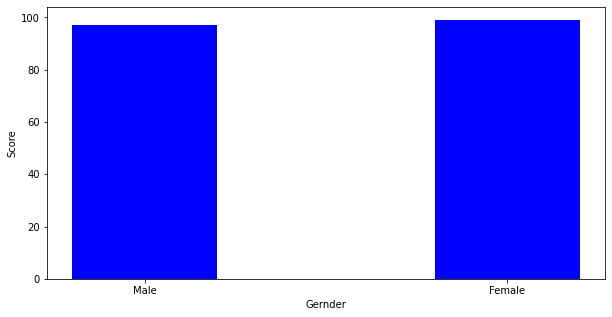

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Gender'], df['Spending Score (1-100)'], color ='blue', width = 0.4)
plt.xlabel('Gernder')
plt.ylabel('Score')
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

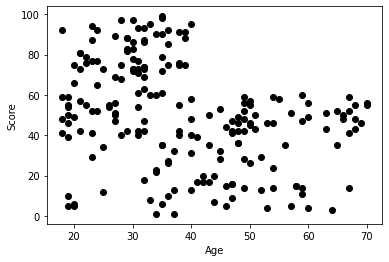

In [8]:
# The score achieved by males is equel to females' score
# Let's check the correlation between age and score
plt.scatter(df['Age'], df['Spending Score (1-100)'], color = 'k', marker = 'o')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show

In [9]:
# Data Preprocessing

In [10]:
# Convert gender to int
x = pd.get_dummies(df)
x = x.iloc[:, 1:]
print(x)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39              0   
1     21                  15                      81              0   
2     20                  16                       6              1   
3     23                  16                      77              1   
4     31                  17                      40              1   
..   ...                 ...                     ...            ...   
195   35                 120                      79              1   
196   45                 126                      28              1   
197   32                 126                      74              0   
198   32                 137                      18              0   
199   30                 137                      83              0   

     Gender_Male  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
195           

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Female           200 non-null    uint8
 4   Gender_Male             200 non-null    uint8
dtypes: int64(3), uint8(2)
memory usage: 5.2 KB


In [12]:
# It is time to cluster our data now
# I would like to cluster the data using 3 methods :KMeans, Heirarchical, DBSCAN

In [13]:
# Method one : KMeans
from sklearn.cluster import KMeans
k_inertia = []
for i in range(1,10):
    K_Means = KMeans(n_clusters = i, random_state = 44)
    K_Means.fit(x)
    k_inertia.append(K_Means.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

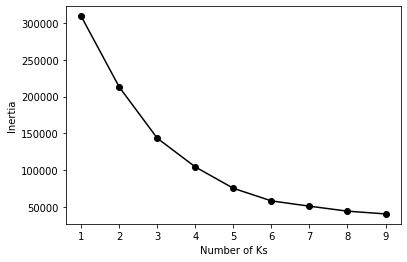

In [14]:
# Using Ellbow method to find the best k for k KMeans:
plt.plot(np.arange(1,10), k_inertia, color = 'k', marker = 'o')
plt.xlabel('Number of Ks')
plt.ylabel('Inertia')
plt.show

In [15]:
# According the above plot and Ellbow method 5 is best k for our KMeans clustering method
K_Means = KMeans(n_clusters = 5)
K_Means.fit(x)
x['cluster'] =  K_Means.labels_

In [16]:
K_labels = K_Means.labels_
type(K_labels)

numpy.ndarray

In [17]:
print(x)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39              0   
1     21                  15                      81              0   
2     20                  16                       6              1   
3     23                  16                      77              1   
4     31                  17                      40              1   
..   ...                 ...                     ...            ...   
195   35                 120                      79              1   
196   45                 126                      28              1   
197   32                 126                      74              0   
198   32                 137                      18              0   
199   30                 137                      83              0   

     Gender_Male  cluster  
0              1        4  
1              1        1  
2              0        4  
3              0        1  
4      

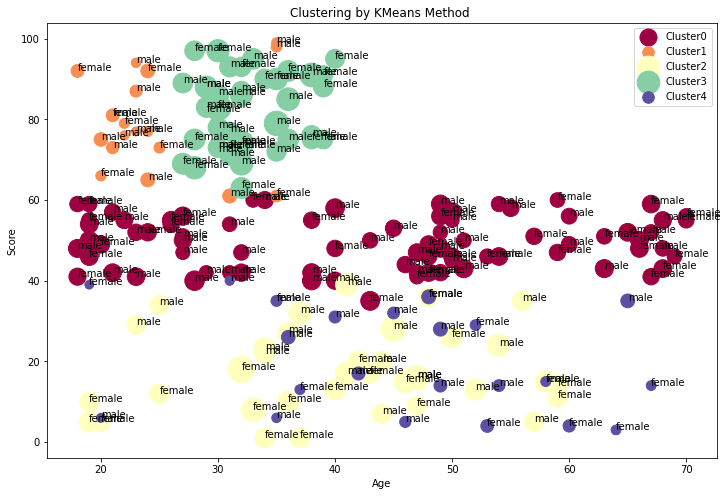

In [18]:
# Let's Visualize our clusters
# I would like to plot the clusters in the way that:
# 1: The vertical axis will be the Customer Score.
# 2: The Horizontal Axis will be the age of cusotmers
# 3: The size of each data point will be ploted according the customers income
# 4: The color of the clusters will show the labels
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(K_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(K_Means.n_clusters), colors):
    my_members = (K_labels == k)
    for i in range(len(x[my_members])):
        if x[my_members].iloc[i,4] == 0:
            sex = 'male'
        elif x[my_members].iloc[i,4] == 1:
            sex = 'female'
        ax.text(x[my_members].iloc[i,0] , x[my_members].iloc[i,2], sex)
     #   print(i)
    #print(x[my_members].iloc[0,0])
    #x.text(x[my_members]['Age'] + 5, x[my_members]['Spending Score (1-100)'], 'S='+str(x[my_members]['Gender']))
    ax.scatter(x[my_members]['Age'], x[my_members]['Spending Score (1-100)'], s = x[my_members]['Annual Income (k$)']*5 , color = col, marker='o', label = 'Cluster'+ str(k))
    
ax.set_title('Clustering by KMeans Method ')
ax.legend()
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()
    



In [19]:
# Second Method
# DBSCAN
from sklearn.cluster import DBSCAN

In [20]:
# Our Data to Cluster
x = x.iloc[:, 0:5]
x

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [23]:
DBS = DBSCAN(eps = 10 , min_samples = 5)
DBS.fit(x)
DBS.n_features_in_
DBlabels = DBS.labels_
x['Cluster'] = DBlabels

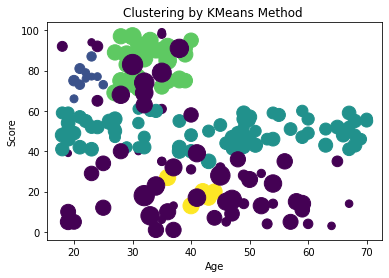

In [32]:
# DBSCAN Visualization 1
plt.scatter(x.iloc[:, 0], x.iloc[:, 2], c = DBlabels, s = x.iloc[:, 1]*3)
plt.title('Clustering by KMeans Method ')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

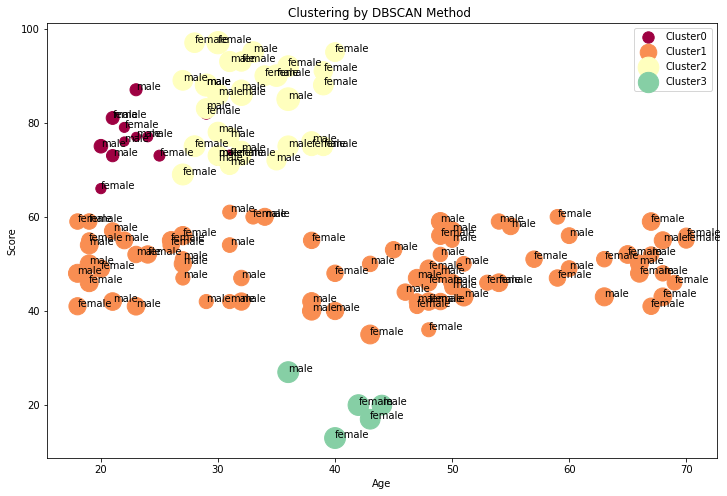

In [33]:
# # DBSCAN Visualization 2
# I would like to plot the clusters in the way that:
# 1: The vertical axis will be the Customer Score.
# 2: The Horizontal Axis will be the age of cusotmers
# 3: The size of each data point will be ploted according the customers income
# 4: The color of the clusters will show the labels
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(DBlabels))))
ax = fig.add_subplot(1, 1, 1)
n_clusters = len(set(DBlabels))- (1 if -1 in DBlabels else 0)
for k, col in zip(range(n_clusters), colors):
    my_members = (DBlabels == k)
    for i in range(len(x[my_members])):
        if x[my_members].iloc[i,4] == 0:
            sex = 'male'
        elif x[my_members].iloc[i,4] == 1:
            sex = 'female'
        ax.text(x[my_members].iloc[i,0] , x[my_members].iloc[i,2], sex)
     #   print(i)
    #print(x[my_members].iloc[0,0])
    #x.text(x[my_members]['Age'] + 5, x[my_members]['Spending Score (1-100)'], 'S='+str(x[my_members]['Gender']))
    ax.scatter(x[my_members]['Age'], x[my_members]['Spending Score (1-100)'], s = x[my_members]['Annual Income (k$)']*5 , color = col, marker='o', label = 'Cluster'+ str(k))
    
ax.set_title('Clustering by DBSCAN Method ')
ax.legend()
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()
    



In [34]:
# Thirth Method:
#Hierarchical

In [35]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
x = x.iloc[:,0:5]
x_n = MinMaxScaler().fit_transform(x)

In [36]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [37]:
# Distance Matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
dist_matrix = euclidean_distances(x_n, x_n)
#print(dist_matrix)
z = hierarchy.linkage(dist_matrix, 'complete')
#print(z)

C:\Users\masou\AppData\Local\Temp/ipykernel_10068/3670302289.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'complete')


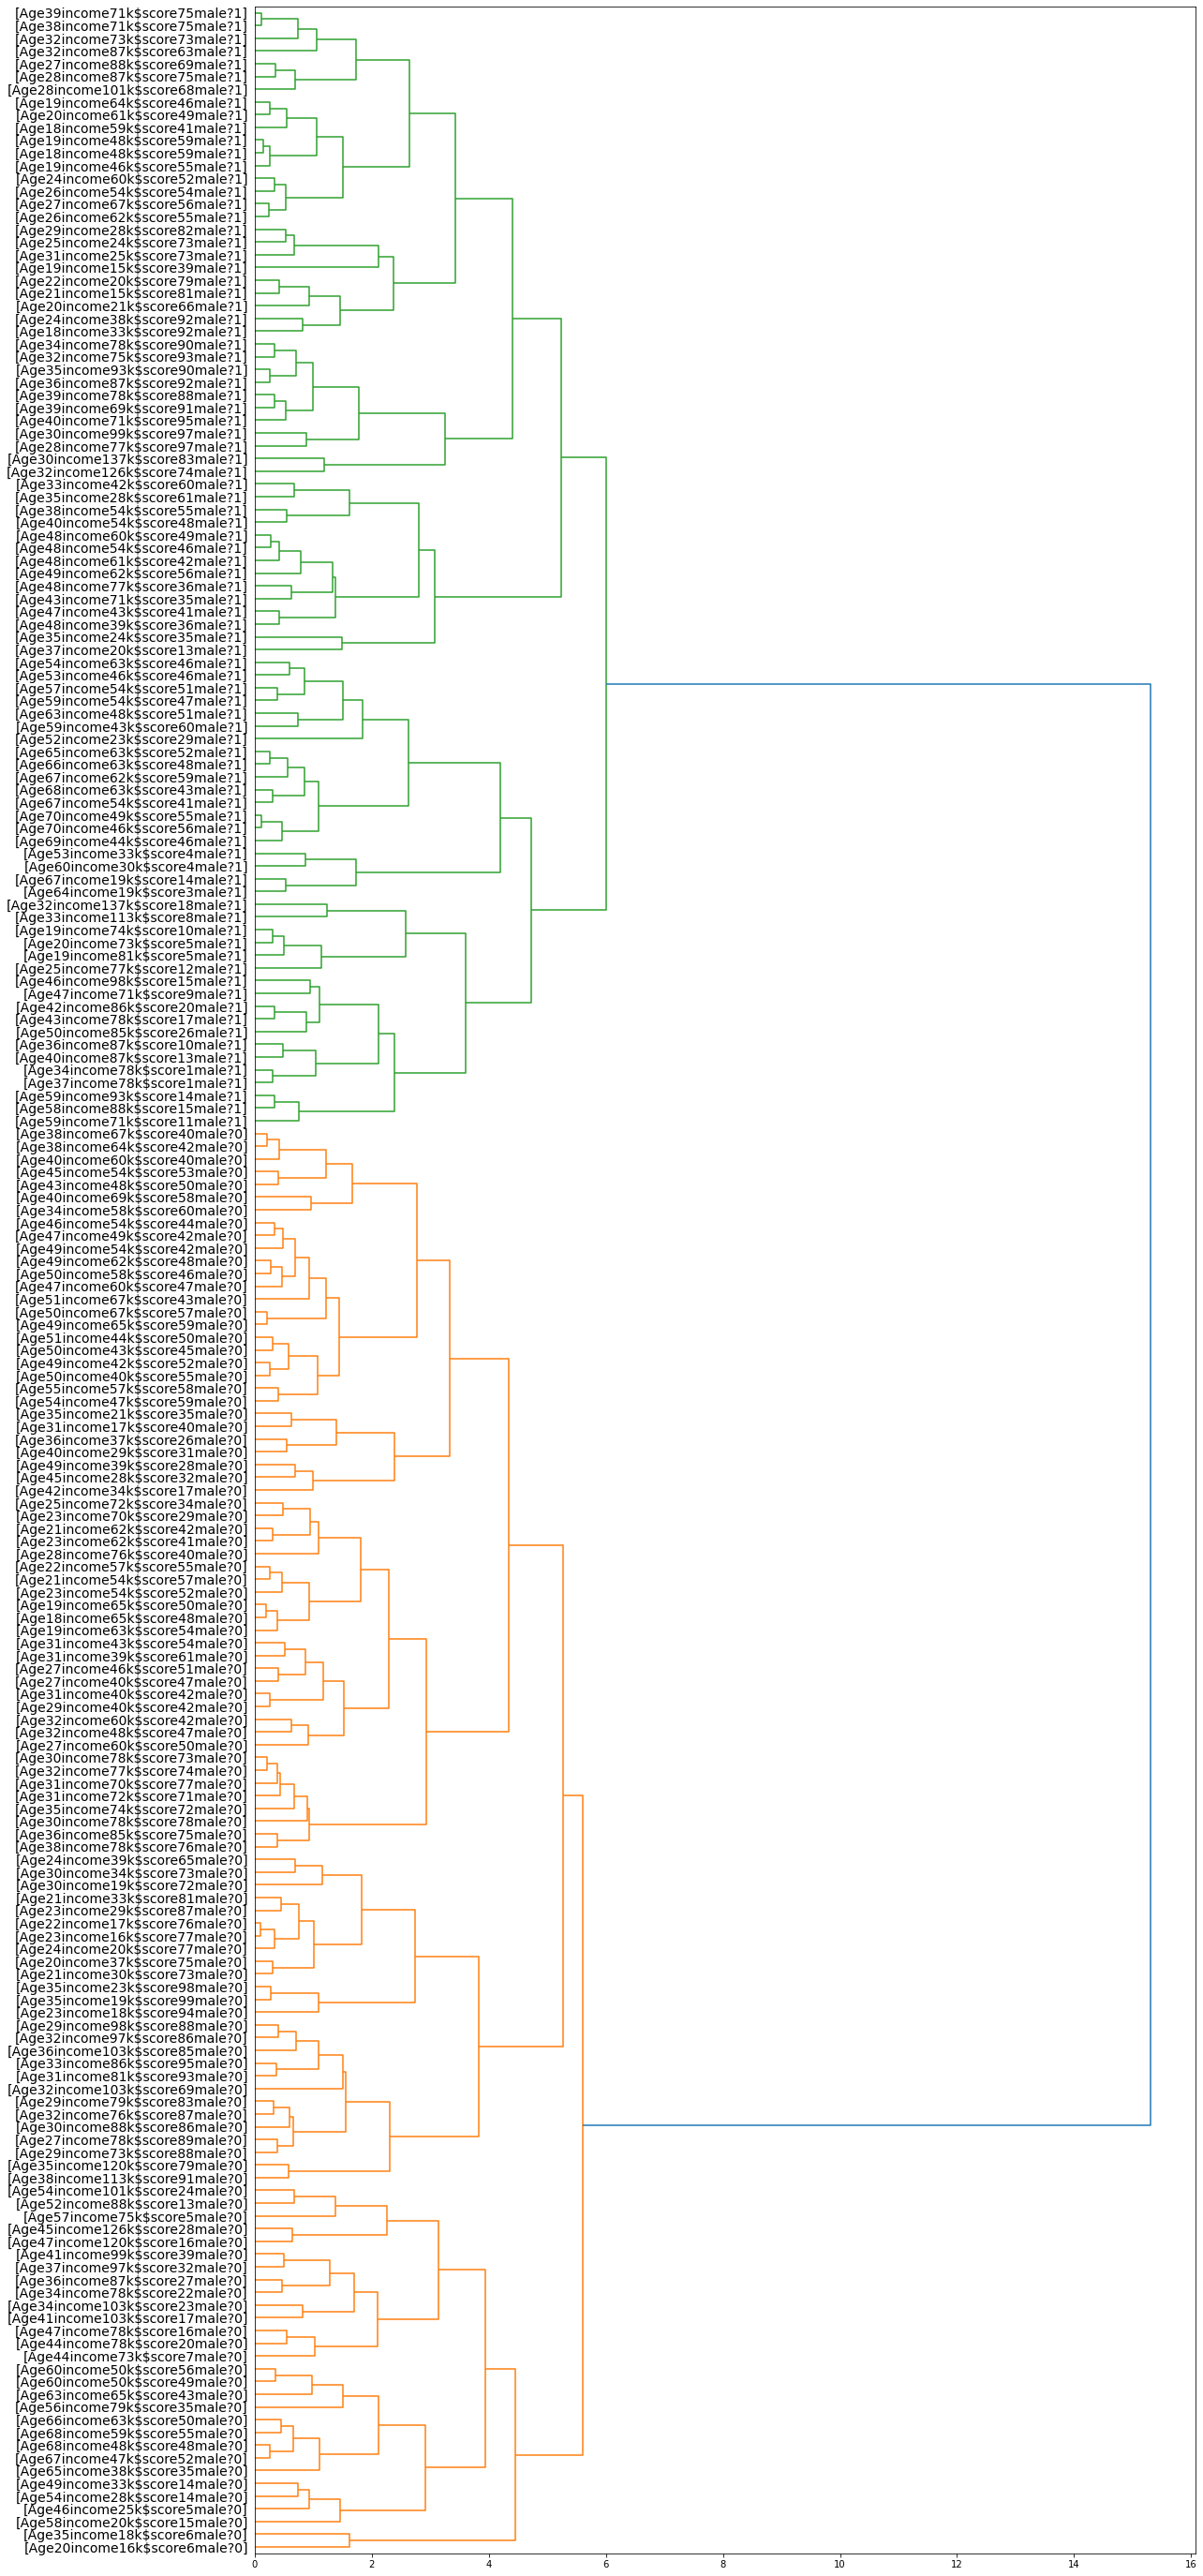

In [31]:
# Dendogram Visualization
from matplotlib import pylab 
fig = pylab.figure(figsize = (18,50))
def llf(id):
    return '[Age%sincome%sk$score%smale?%s]'%((x['Age'][id]), (x['Annual Income (k$)'][id]), x['Spending Score (1-100)'][id], x['Gender_Male'][id])
dend = hierarchy.dendrogram(z, leaf_label_func = llf, leaf_font_size = 14, orientation = 'right')


In [51]:
# Lets's do the visualization using scatter method to understand the clusters better
h_labels = hierarchy.fcluster(z, 5.5, criterion= 'distance')

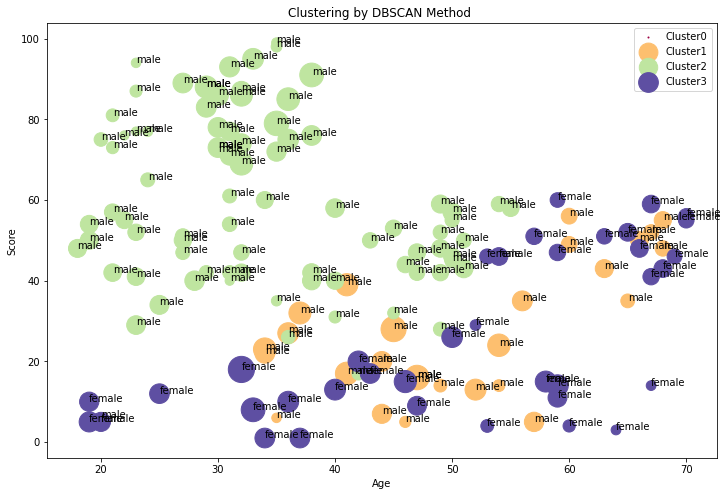

In [52]:
# # Hierarchy Scatter Visualization 
# I would like to plot the clusters in the way that:
# 1: The vertical axis will be the Customer Score.
# 2: The Horizontal Axis will be the age of cusotmers
# 3: The size of each data point will be ploted according the customers income
# 4: The color of the clusters will show the labels
fig = plt.figure(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(h_labels))))
ax = fig.add_subplot(1, 1, 1)
n_clusters = len(set(h_labels))
for k, col in zip(range(n_clusters), colors):
    my_members = (h_labels == k)
    for i in range(len(x[my_members])):
        if x[my_members].iloc[i,4] == 0:
            sex = 'male'
        elif x[my_members].iloc[i,4] == 1:
            sex = 'female'
        ax.text(x[my_members].iloc[i,0] , x[my_members].iloc[i,2], sex)
     #   print(i)
    #print(x[my_members].iloc[0,0])
    #x.text(x[my_members]['Age'] + 5, x[my_members]['Spending Score (1-100)'], 'S='+str(x[my_members]['Gender']))
    ax.scatter(x[my_members]['Age'], x[my_members]['Spending Score (1-100)'], s = x[my_members]['Annual Income (k$)']*5 , color = col, marker='o', label = 'Cluster'+ str(k))
    
ax.set_title('Clustering by DBSCAN Method ')
ax.legend()
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()
    